In [209]:
import os
import pandas as pd
import numpy as np
import djmix as dj

In [210]:
mixes_columns = [
    'mix_id',
    'mix_title',
    'url',
    'audio_source',
    'audio_url',
    'identified_tracks',
    'tracks',
    'transitions',
    'timestamps',
    'tracklist',
    'genre'
]

In [211]:
tracks_columns = [
    'track_id',
    'track_title'
]

In [212]:
all_mixes = pd.read_json('../data/djmix-dataset.json')

In [213]:
all_tracks = pd.DataFrame(dj.tracks.values())
all_tracks.columns = tracks_columns
all_tracks = all_tracks.applymap(lambda x: x[1])
all_tracks.head()

,track_id,track_title
0,MS4fnBfTkf0,[00] Jhalib - Mysteries Of The East
1,6gGr8O40OXs,[05] Code 61 - Drop The Deal [Limited Club Edi...
2,nzl0hOm-8WQ,[09] Cappella - Bauhaus [Media -MR 519]
3,qizk3MTuc2U,[11] Area Code 615 - Stone Fox Chase [Polydor ...
4,_BpWjG_10gY,[13] Beats Workin' - Sure Beats Workin' [FFRR ...


In [214]:
all_mixes.columns = mixes_columns

In [215]:
all_mixes['genre'] = all_mixes['genre'].apply(lambda x: x[-1]['key'].replace('Category:', ''))

In [216]:
all_mixes['year'] = all_mixes.mix_title.str[:4]

In [217]:
all_mixes.columns

Index(['mix_id', 'mix_title', 'url', 'audio_source', 'audio_url',
       'identified_tracks', 'tracks', 'transitions', 'timestamps', 'tracklist',
       'genre', 'year'],
      dtype='object')

In [218]:
mixes_clean = all_mixes[['mix_id', 'year', 'identified_tracks', 'tracks', 'genre', 'tracklist']]

In [219]:
mixes_clean = mixes_clean.reset_index(drop=True)

In [220]:
mixes_clean

,mix_id,year,identified_tracks,tracks,genre,tracklist
0,mix0000,1988,23,26,House (Old School),"[{'id': 'MS4fnBfTkf0', 'title': '[00] Jhalib -..."
1,mix0001,1991,26,42,House,"[{'id': None, 'title': '[00:00] Adonte - Feel ..."
2,mix0002,1993,17,24,Trance,"[{'id': 'W5AxmLF55ko', 'title': 'Lee Marrow & ..."
3,mix0003,1993,15,20,Tech House,"[{'id': 'gHMoKz-q_mU', 'title': 'Killing Joke ..."
4,mix0004,1993,17,23,Jungle,"[{'id': None, 'title': 'Shades Of Rhythm - Swe..."
...,...,...,...,...,...,...
5035,mix5035,2020,17,20,Techno,"[{'id': '1IUx7yZoYuo', 'title': 'Wehbba - Prel..."
5036,mix5036,2020,20,24,Hardcore,"[{'id': 'ydtq3Y9QjNU', 'title': 'Isotonik - Di..."
5037,mix5037,2020,27,32,House,"[{'id': 'T-WgJKPsxm8', 'title': 'Lea Lisa Feat..."
5038,mix5038,2021,15,19,Techno,"[{'id': 'cvvkd6YAfHw', 'title': '[00] NGLY - M..."


In [221]:
mixes_clean.to_csv('../data/mixes_clean.csv')

In [222]:
mixes_clean.tracklist = mixes_clean.tracklist.apply(lambda x: [next(iter(d.values())) for d in x])

In [223]:
mixes_clean

,mix_id,year,identified_tracks,tracks,genre,tracklist
0,mix0000,1988,23,26,House (Old School),"[MS4fnBfTkf0, 6gGr8O40OXs, nzl0hOm-8WQ, qizk3M..."
1,mix0001,1991,26,42,House,"[None, Tqu-2sZSNEc, VNzzgNX1k4Q, mNFzhWAL5r0, ..."
2,mix0002,1993,17,24,Trance,"[W5AxmLF55ko, uH0ZJNHFy6I, None, None, V8Ay25B..."
3,mix0003,1993,15,20,Tech House,"[gHMoKz-q_mU, None, None, 8c6mgsfayKY, None, N..."
4,mix0004,1993,17,23,Jungle,"[None, None, None, None, ylmoTGBoGho, Kfq-cLE5..."
...,...,...,...,...,...,...
5035,mix5035,2020,17,20,Techno,"[1IUx7yZoYuo, None, M5_MnSBb_Aw, 6E5SWsGWXNA, ..."
5036,mix5036,2020,20,24,Hardcore,"[ydtq3Y9QjNU, XknyEqvkXpo, LVHljNyiBkM, CpKYoi..."
5037,mix5037,2020,27,32,House,"[T-WgJKPsxm8, O2TEuO4Fm30, G9hyEx5SWng, Rc2Zzu..."
5038,mix5038,2021,15,19,Techno,"[cvvkd6YAfHw, None, o8n4ZijzC_g, uxwo7pa7cXk, ..."


In [224]:
mixes_clean['tracks_set'] = mixes_clean['tracklist'].apply(lambda x: [i for i in x if i is not None]).apply(set)

In [225]:
mixes_clean

,mix_id,year,identified_tracks,tracks,genre,tracklist,tracks_set
0,mix0000,1988,23,26,House (Old School),"[MS4fnBfTkf0, 6gGr8O40OXs, nzl0hOm-8WQ, qizk3M...","{AWTooBL_EGU, nzl0hOm-8WQ, 09L0l9ygLZM, qizk3M..."
1,mix0001,1991,26,42,House,"[None, Tqu-2sZSNEc, VNzzgNX1k4Q, mNFzhWAL5r0, ...","{HBttSU1yDP8, NdzZGteAFjw, gLd-KE0MKKw, 9WTr3i..."
2,mix0002,1993,17,24,Trance,"[W5AxmLF55ko, uH0ZJNHFy6I, None, None, V8Ay25B...","{CxFwbRfuUvk, agPQBtHqzgA, avbISsqBLt8, 0gmhgW..."
3,mix0003,1993,15,20,Tech House,"[gHMoKz-q_mU, None, None, 8c6mgsfayKY, None, N...","{rclzB0SCzGw, 5Uyf-NVC7Yo, Gl7Y4y3EZL8, YeI795..."
4,mix0004,1993,17,23,Jungle,"[None, None, None, None, ylmoTGBoGho, Kfq-cLE5...","{UvawdftUaWI, XzDZBHpT9Qg, LumVKcFO9Ns, MbkqJK..."
...,...,...,...,...,...,...,...
5035,mix5035,2020,17,20,Techno,"[1IUx7yZoYuo, None, M5_MnSBb_Aw, 6E5SWsGWXNA, ...","{aXf9D8XU_ZA, Csvs8XFLh7U, h6hF4ZOjCjo, mrbwzO..."
5036,mix5036,2020,20,24,Hardcore,"[ydtq3Y9QjNU, XknyEqvkXpo, LVHljNyiBkM, CpKYoi...","{CpKYoiEuAXs, hbjWBWXeQsk, XknyEqvkXpo, 15SbP5..."
5037,mix5037,2020,27,32,House,"[T-WgJKPsxm8, O2TEuO4Fm30, G9hyEx5SWng, Rc2Zzu...","{gm05KRHjVvY, falXfd2sffM, 95vYvs1jdjg, VE7lyl..."
5038,mix5038,2021,15,19,Techno,"[cvvkd6YAfHw, None, o8n4ZijzC_g, uxwo7pa7cXk, ...","{htFQAkosToI, uxwo7pa7cXk, cvvkd6YAfHw, OvsJ92..."


In [226]:
file_ids = set()
path = '/Users/bjornbraun/djmix/tracks/'
files = os.listdir(path)
for file in files:
    file_id = file[:-8]
    file_ids.add(file_id)

In [227]:
len(file_ids)

3410

In [228]:
mixes_clean['tracks_set'].apply(lambda x: x.intersection(file_ids) if len(x.intersection(file_ids)) > 0 else None)

0       {AWTooBL_EGU, nzl0hOm-8WQ, 09L0l9ygLZM, qizk3M...
1                                                    None
2                                                    None
3                                                    None
4                                                    None
                              ...                        
5035                                                 None
5036                           {-4HhUSQA_7s, RW4YfSxBeAw}
5037                                        {9uR0LJ_m6rY}
5038                                                 None
5039                                                 None
Name: tracks_set, Length: 5040, dtype: object

In [229]:
mixes_clean['in_files'] = mixes_clean['tracks_set'].apply(lambda x: x.intersection(file_ids) if len(x.intersection(file_ids)) > 0 else np.nan)

In [230]:
mixes_clean

,mix_id,year,identified_tracks,tracks,genre,tracklist,tracks_set,in_files
0,mix0000,1988,23,26,House (Old School),"[MS4fnBfTkf0, 6gGr8O40OXs, nzl0hOm-8WQ, qizk3M...","{AWTooBL_EGU, nzl0hOm-8WQ, 09L0l9ygLZM, qizk3M...","{AWTooBL_EGU, nzl0hOm-8WQ, 09L0l9ygLZM, qizk3M..."
1,mix0001,1991,26,42,House,"[None, Tqu-2sZSNEc, VNzzgNX1k4Q, mNFzhWAL5r0, ...","{HBttSU1yDP8, NdzZGteAFjw, gLd-KE0MKKw, 9WTr3i...",NaN
2,mix0002,1993,17,24,Trance,"[W5AxmLF55ko, uH0ZJNHFy6I, None, None, V8Ay25B...","{CxFwbRfuUvk, agPQBtHqzgA, avbISsqBLt8, 0gmhgW...",NaN
3,mix0003,1993,15,20,Tech House,"[gHMoKz-q_mU, None, None, 8c6mgsfayKY, None, N...","{rclzB0SCzGw, 5Uyf-NVC7Yo, Gl7Y4y3EZL8, YeI795...",NaN
4,mix0004,1993,17,23,Jungle,"[None, None, None, None, ylmoTGBoGho, Kfq-cLE5...","{UvawdftUaWI, XzDZBHpT9Qg, LumVKcFO9Ns, MbkqJK...",NaN
...,...,...,...,...,...,...,...,...
5035,mix5035,2020,17,20,Techno,"[1IUx7yZoYuo, None, M5_MnSBb_Aw, 6E5SWsGWXNA, ...","{aXf9D8XU_ZA, Csvs8XFLh7U, h6hF4ZOjCjo, mrbwzO...",NaN
5036,mix5036,2020,20,24,Hardcore,"[ydtq3Y9QjNU, XknyEqvkXpo, LVHljNyiBkM, CpKYoi...","{CpKYoiEuAXs, hbjWBWXeQsk, XknyEqvkXpo, 15SbP5...","{-4HhUSQA_7s, RW4YfSxBeAw}"
5037,mix5037,2020,27,32,House,"[T-WgJKPsxm8, O2TEuO4Fm30, G9hyEx5SWng, Rc2Zzu...","{gm05KRHjVvY, falXfd2sffM, 95vYvs1jdjg, VE7lyl...",{9uR0LJ_m6rY}
5038,mix5038,2021,15,19,Techno,"[cvvkd6YAfHw, None, o8n4ZijzC_g, uxwo7pa7cXk, ...","{htFQAkosToI, uxwo7pa7cXk, cvvkd6YAfHw, OvsJ92...",NaN


In [231]:
mixes = mixes_clean[mixes_clean['in_files'].notna()]

In [232]:
mixes = mixes.reset_index(drop=True)

In [233]:
mixes

,mix_id,year,identified_tracks,tracks,genre,tracklist,tracks_set,in_files
0,mix0000,1988,23,26,House (Old School),"[MS4fnBfTkf0, 6gGr8O40OXs, nzl0hOm-8WQ, qizk3M...","{AWTooBL_EGU, nzl0hOm-8WQ, 09L0l9ygLZM, qizk3M...","{AWTooBL_EGU, nzl0hOm-8WQ, 09L0l9ygLZM, qizk3M..."
1,mix0009,1994,12,13,Drum & Bass,"[3pqGFVLxpYk, LlvFRKo9kIQ, Ao6IWkF5JlU, dVHPDA...","{LlvFRKo9kIQ, dVHPDAUCL0U, PAyO4LsoGyI, 59tafA...",{dVHPDAUCL0U}
2,mix0010,1994,25,30,Tech House,"[GeOJ80fEb-4, None, None, FHcw6gNVauY, TccEptv...","{Z7If6GODLFc, TccEptvVwb8, GeOJ80fEb-4, Uo15eS...",{rYBUDRSeeeE}
3,mix0011,1994,30,37,House,"[-3bcdTQzBAk, 95gP3m-uBHA, 5oe3mEx_-JQ, YkTyQ0...","{6lcVj-qhpv4, n2gNWtvgjUU, 200tmiDdht0, b-elzq...","{200tmiDdht0, b-elzq4IaOk}"
4,mix0012,1994,23,31,Trance,"[None, pfwHUs6I1LY, JWIXkF_7JII, qBYNKS-lC28, ...","{gRCsUVEkCgQ, VJA6ucUcj6k, QoV0Hra1YzA, OM9Kdv...",{JWIXkF_7JII}
...,...,...,...,...,...,...,...,...
1799,mix5001,2020,14,18,Techno,"[3VbNZljZFu8, 55t6_Nny4Js, jiM8m6LWRys, None, ...","{D1FXhk9wwX4, EygzCaKCvJY, OX_0fNJjtv8, jiM8m6...",{4CvTB1IVROE}
1800,mix5018,2020,23,44,Techno,"[None, None, 05tKDsiR8cw, JX9S0GmU12U, None, j...","{05tKDsiR8cw, p70t7eyfp-E, OwLaFl9pPFY, RqzWzB...",{SaHYu2GK46I}
1801,mix5034,2020,18,18,Hardcore,"[THCj2AJuNVE, XzmpwHcwBlI, 15SbP5Yh0fk, EuPxJO...","{diK6rCWtzkE, 4lsKkjJbtkM, kkmqyItSXU4, WY87o9...",{WY87o9IZXWg}
1802,mix5036,2020,20,24,Hardcore,"[ydtq3Y9QjNU, XknyEqvkXpo, LVHljNyiBkM, CpKYoi...","{CpKYoiEuAXs, hbjWBWXeQsk, XknyEqvkXpo, 15SbP5...","{-4HhUSQA_7s, RW4YfSxBeAw}"


In [234]:
mixes['count_files'] = mixes.in_files.apply(lambda x: len(x))

#### CLEAN YEAR

In [235]:
mixes['year'].value_counts()

2014    384
2015    302
2013    281
2016    279
2017    167
2012    128
2018     44
2019     43
2011     38
2020     22
2002     15
2010     14
2006     13
2005     11
2007     11
2003      8
2000      8
2009      6
1997      6
1994      4
2001      4
1996      4
1995      4
200X      2
1998      2
201X      1
1988      1
2004      1
2008      1
Name: year, dtype: int64

In [236]:
mixes[mixes['year'] == '201X']

,mix_id,year,identified_tracks,tracks,genre,tracklist,tracks_set,in_files,count_files
1781,mix4836,201X,10,13,House,"[1BArXKKLVUc, XpboELpY7Ho, MOc5LXeWWcw, Oe2tGk...","{XpboELpY7Ho, rSIX4kXq2nM, Oe2tGkWjZxY, NFE_p3...","{XpboELpY7Ho, 1BArXKKLVUc, rSIX4kXq2nM}",3


In [237]:
mixes[mixes['year'] == '200X']

,mix_id,year,identified_tracks,tracks,genre,tracklist,tracks_set,in_files,count_files
99,mix0296,200X,17,18,Drum & Bass,"[None, XVhueOZlV9M, Tgea8e2x7Tk, StO8BQHxNCc, ...","{XVhueOZlV9M, Tgea8e2x7Tk, P7RMcVV9mQ0, ISdKpN...","{z_VKMWs2eaI, P7RMcVV9mQ0, 1OKSAml3H4w}",3
100,mix0297,200X,18,22,Acid House,"[xj-MPJ5glYc, hyDrfiVsW34, CvfLziX2lRE, ofZrHh...","{6Eu9IBxAiwg, g5nZ-mHKAQE, hyDrfiVsW34, CvfLzi...",{DXhqDeTSEl4},1


In [238]:
mixes.at[1781, 'year'] = mixes.at[1780, 'year']
mixes.at[99, 'year'] = mixes.at[98, 'year']
mixes.at[100, 'year'] = mixes.at[101, 'year']

In [239]:
mixes['year'] = mixes.year.astype(int)

In [240]:
mixes.describe()

,year,identified_tracks,tracks,count_files
count,1804.000000,1804.000000,1804.000000,1804.000000
mean,2014.014967,16.837029,20.450111,3.359202
std,3.500938,6.363202,8.303335,4.744804
min,1988.000000,8.000000,9.000000,1.000000
25%,2013.000000,12.000000,14.000000,1.000000
50%,2014.000000,15.000000,18.000000,1.000000
75%,2016.000000,20.000000,25.250000,3.000000
max,2020.000000,48.000000,60.000000,48.000000


In [241]:
mixes

,mix_id,year,identified_tracks,tracks,genre,tracklist,tracks_set,in_files,count_files
0,mix0000,1988,23,26,House (Old School),"[MS4fnBfTkf0, 6gGr8O40OXs, nzl0hOm-8WQ, qizk3M...","{AWTooBL_EGU, nzl0hOm-8WQ, 09L0l9ygLZM, qizk3M...","{AWTooBL_EGU, nzl0hOm-8WQ, 09L0l9ygLZM, qizk3M...",22
1,mix0009,1994,12,13,Drum & Bass,"[3pqGFVLxpYk, LlvFRKo9kIQ, Ao6IWkF5JlU, dVHPDA...","{LlvFRKo9kIQ, dVHPDAUCL0U, PAyO4LsoGyI, 59tafA...",{dVHPDAUCL0U},1
2,mix0010,1994,25,30,Tech House,"[GeOJ80fEb-4, None, None, FHcw6gNVauY, TccEptv...","{Z7If6GODLFc, TccEptvVwb8, GeOJ80fEb-4, Uo15eS...",{rYBUDRSeeeE},1
3,mix0011,1994,30,37,House,"[-3bcdTQzBAk, 95gP3m-uBHA, 5oe3mEx_-JQ, YkTyQ0...","{6lcVj-qhpv4, n2gNWtvgjUU, 200tmiDdht0, b-elzq...","{200tmiDdht0, b-elzq4IaOk}",2
4,mix0012,1994,23,31,Trance,"[None, pfwHUs6I1LY, JWIXkF_7JII, qBYNKS-lC28, ...","{gRCsUVEkCgQ, VJA6ucUcj6k, QoV0Hra1YzA, OM9Kdv...",{JWIXkF_7JII},1
...,...,...,...,...,...,...,...,...,...
1799,mix5001,2020,14,18,Techno,"[3VbNZljZFu8, 55t6_Nny4Js, jiM8m6LWRys, None, ...","{D1FXhk9wwX4, EygzCaKCvJY, OX_0fNJjtv8, jiM8m6...",{4CvTB1IVROE},1
1800,mix5018,2020,23,44,Techno,"[None, None, 05tKDsiR8cw, JX9S0GmU12U, None, j...","{05tKDsiR8cw, p70t7eyfp-E, OwLaFl9pPFY, RqzWzB...",{SaHYu2GK46I},1
1801,mix5034,2020,18,18,Hardcore,"[THCj2AJuNVE, XzmpwHcwBlI, 15SbP5Yh0fk, EuPxJO...","{diK6rCWtzkE, 4lsKkjJbtkM, kkmqyItSXU4, WY87o9...",{WY87o9IZXWg},1
1802,mix5036,2020,20,24,Hardcore,"[ydtq3Y9QjNU, XknyEqvkXpo, LVHljNyiBkM, CpKYoi...","{CpKYoiEuAXs, hbjWBWXeQsk, XknyEqvkXpo, 15SbP5...","{-4HhUSQA_7s, RW4YfSxBeAw}",2


#### FILTERING FOR MIN 4 MAX 12 SONGS PER MIX

In [242]:
mixes_12 = mixes[mixes.count_files <= 12]

In [243]:
mixes_12

,mix_id,year,identified_tracks,tracks,genre,tracklist,tracks_set,in_files,count_files
1,mix0009,1994,12,13,Drum & Bass,"[3pqGFVLxpYk, LlvFRKo9kIQ, Ao6IWkF5JlU, dVHPDA...","{LlvFRKo9kIQ, dVHPDAUCL0U, PAyO4LsoGyI, 59tafA...",{dVHPDAUCL0U},1
2,mix0010,1994,25,30,Tech House,"[GeOJ80fEb-4, None, None, FHcw6gNVauY, TccEptv...","{Z7If6GODLFc, TccEptvVwb8, GeOJ80fEb-4, Uo15eS...",{rYBUDRSeeeE},1
3,mix0011,1994,30,37,House,"[-3bcdTQzBAk, 95gP3m-uBHA, 5oe3mEx_-JQ, YkTyQ0...","{6lcVj-qhpv4, n2gNWtvgjUU, 200tmiDdht0, b-elzq...","{200tmiDdht0, b-elzq4IaOk}",2
4,mix0012,1994,23,31,Trance,"[None, pfwHUs6I1LY, JWIXkF_7JII, qBYNKS-lC28, ...","{gRCsUVEkCgQ, VJA6ucUcj6k, QoV0Hra1YzA, OM9Kdv...",{JWIXkF_7JII},1
5,mix0013,1995,14,16,Hard Trance,"[KtpR8vqrMV0, CBPayK-utcA, MD4asvIQsfw, qebvIL...","{cWUmfWddb5M, avaiTHwCkIc, KtpR8vqrMV0, AjPxjV...",{_2XTFe9J5wY},1
...,...,...,...,...,...,...,...,...,...
1799,mix5001,2020,14,18,Techno,"[3VbNZljZFu8, 55t6_Nny4Js, jiM8m6LWRys, None, ...","{D1FXhk9wwX4, EygzCaKCvJY, OX_0fNJjtv8, jiM8m6...",{4CvTB1IVROE},1
1800,mix5018,2020,23,44,Techno,"[None, None, 05tKDsiR8cw, JX9S0GmU12U, None, j...","{05tKDsiR8cw, p70t7eyfp-E, OwLaFl9pPFY, RqzWzB...",{SaHYu2GK46I},1
1801,mix5034,2020,18,18,Hardcore,"[THCj2AJuNVE, XzmpwHcwBlI, 15SbP5Yh0fk, EuPxJO...","{diK6rCWtzkE, 4lsKkjJbtkM, kkmqyItSXU4, WY87o9...",{WY87o9IZXWg},1
1802,mix5036,2020,20,24,Hardcore,"[ydtq3Y9QjNU, XknyEqvkXpo, LVHljNyiBkM, CpKYoi...","{CpKYoiEuAXs, hbjWBWXeQsk, XknyEqvkXpo, 15SbP5...","{-4HhUSQA_7s, RW4YfSxBeAw}",2


In [244]:
mixes_4_12 = mixes_12[mixes_12.count_files > 3]

In [245]:
mixes_4_12

,mix_id,year,identified_tracks,tracks,genre,tracklist,tracks_set,in_files,count_files
6,mix0015,1995,31,35,Techno,"[mLOYC8W3ms0, 6RogMtDT9F4, dxWfZFJln-g, ZpqnOs...","{XGqydwBHlqA, ynB-E722owE, hbl4ZlQ-O2I, QrRVYX...","{tFFbEUyYrhI, XGqydwBHlqA, 4o4joooH5tg, hbl4Zl...",4
12,mix0028,1996,17,20,Drum & Bass,"[None, AhEJwVj4IKo, n_B-fqp1R6Y, p1f3GX1WGoU, ...","{36dPCRvN9Qo, Q2aAezzxPQo, 1eofz0uYwGs, AhEJwV...","{PjTvhOYFgTk, 2Gl0n4KEeh0, mRBzsAD7MRE, JBY0mx...",4
25,mix0066,2000,10,13,Progressive,"[None, qycAC_6Bbto, _QFaJ10-IfA, mSCtgcTBJpw, ...","{3uOKYulJqtw, Y_Gx61HRUHA, eo9Wk8EQX-E, dYu9lv...","{3uOKYulJqtw, Y_Gx61HRUHA, eo9Wk8EQX-E, dYu9lv...",9
41,mix0130,2002,20,22,Trance,"[ZI_zIM9mxYI, miTU7w6kj0Q, None, n2zL0DYC8gc, ...","{Nz2SHyePD2o, AGG5aVN1sQA, 7kzo0Q-6AQc, IkSV2A...","{Nz2SHyePD2o, 4fzMzAejqSs, NZWw0wD3Bwk, tBnf98...",4
46,mix0136,2002,19,20,Trance,"[NZWw0wD3Bwk, oBXfAPtGJkg, gINgF2YbAzo, zxxx-U...","{tc1Bsq0MxhA, gINgF2YbAzo, 5zSCTIsjDzM, TWIh8S...","{fGBEwRFam_4, vq4kUjqBh10, tcwjlNMPxMM, NZWw0w...",5
...,...,...,...,...,...,...,...,...,...
1721,mix4292,2018,10,10,Various,"[zw9be5Z7SD8, ik36D_D4hvA, SBu9ebHhiL8, 6lQTwh...","{v4AlFsTCRLk, xi5DFdQnnfA, AFJjIPMDJ_8, kWIxEg...","{v4AlFsTCRLk, xi5DFdQnnfA, AFJjIPMDJ_8, kWIxEg...",9
1739,mix4449,2019,10,13,Various,"[FwvHof6QbVM, 0U5yzv3o6ug, 0gEC_jJ9a9g, None, ...","{0U5yzv3o6ug, bFaYHds8mOY, N-9LDX7eSmw, 0gEC_j...","{0U5yzv3o6ug, bFaYHds8mOY, 0gEC_jJ9a9g, f3G8zi...",8
1763,mix4646,2019,10,11,Various,"[EPC1u4vQ6Kk, None, InE1GUFz_fA, HrYWeIdEyVE, ...","{zvFVOvyazkc, Uztdy09PGZ4, HrYWeIdEyVE, InE1GU...","{zvFVOvyazkc, -u2dyIlTpSo, HrYWeIdEyVE, InE1GU...",10
1770,mix4699,2019,10,12,Jungle,"[VDoIfDghpyk, kU65WDeoMps, hOulfSfBhPc, vMZz7X...","{VDoIfDghpyk, kU65WDeoMps, Ez1-Ez-wKcI, IE9dbu...","{VDoIfDghpyk, kU65WDeoMps, Ez1-Ez-wKcI, IE9dbu...",10


In [246]:
mixes_4_12['count_files'].sum()

1902

<Axes: ylabel='genre'>

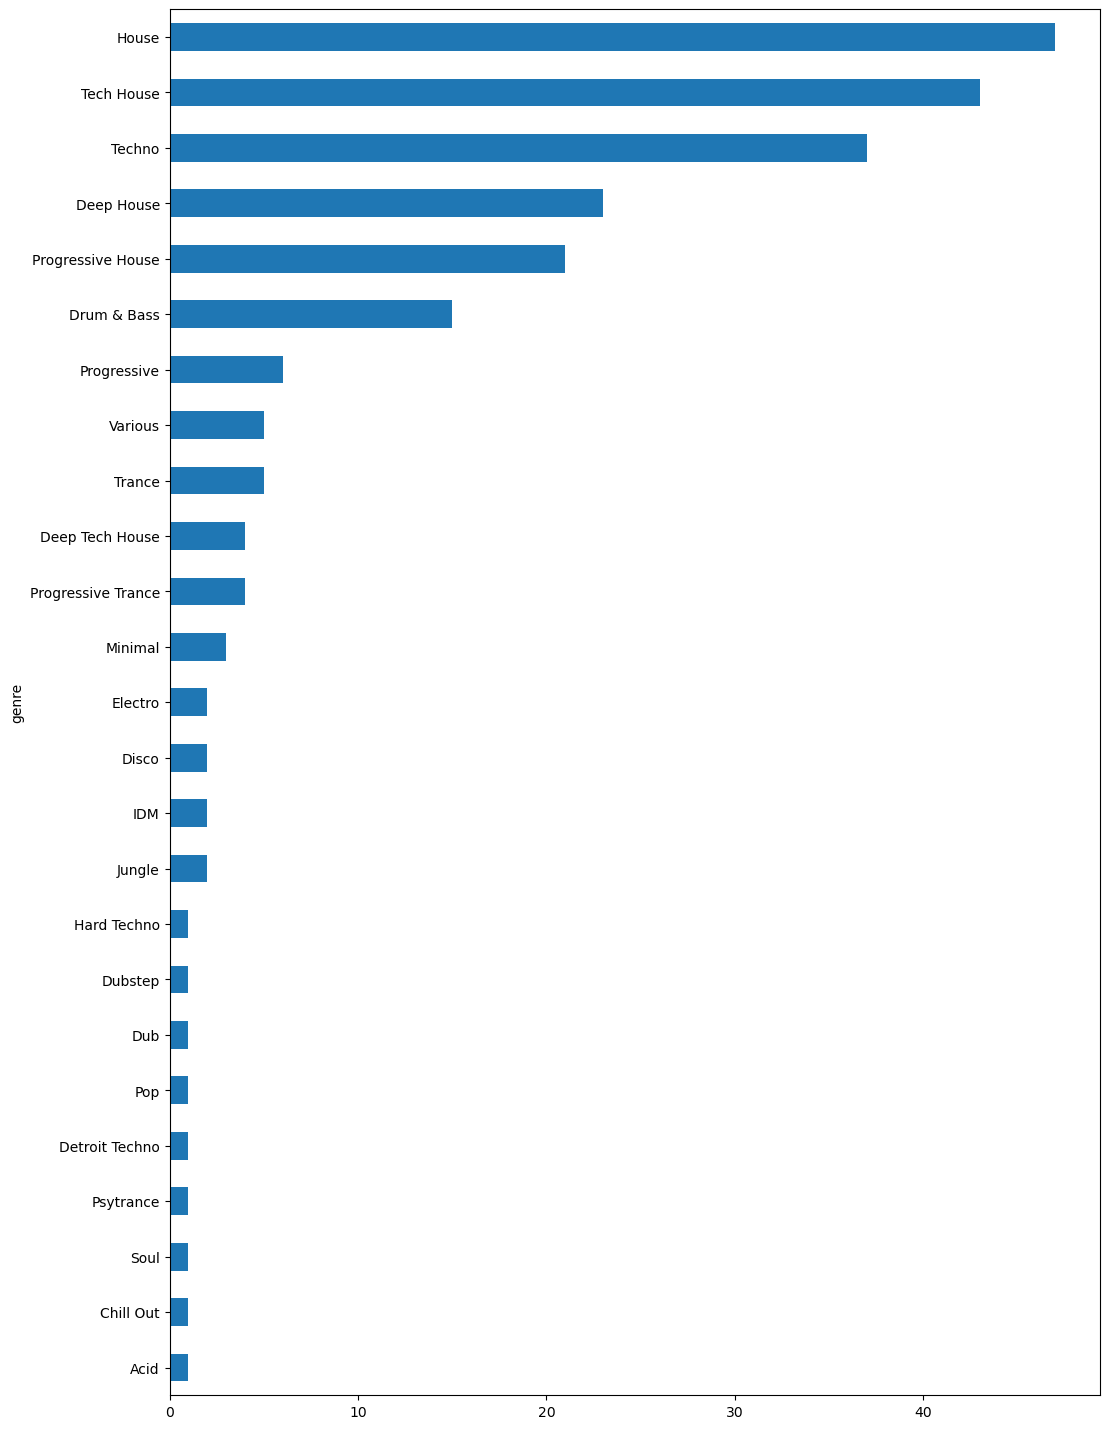

In [247]:
mixes_4_12.groupby(['genre'])['mix_id'].count().sort_values().plot.barh(figsize=(12,18))

#### NEXT: NORMALIZE GENRES